In [1]:
# Install TensorFlow-GPU
!pip install tensorflow==2.18.0

In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/content/drive/MyDrive/mbti_1.csv')

In [4]:
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


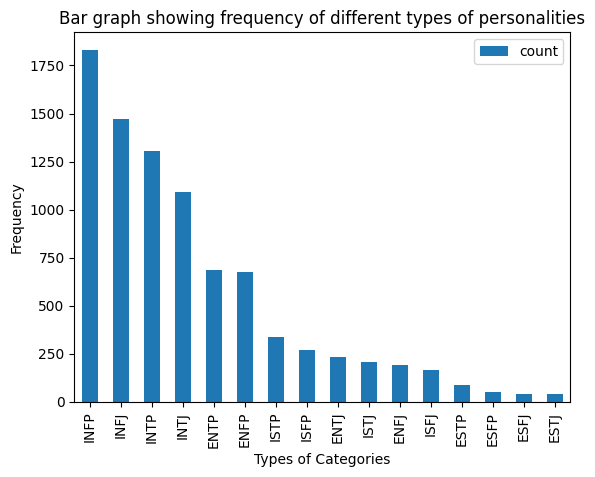

In [6]:
pd.DataFrame(df.type.value_counts()).plot.bar()
plt.ylabel('Frequency')
plt.xlabel('Types of Categories')
plt.title('Bar graph showing frequency of different types of personalities')
plt.show()

<ipython-input-7-545b4b8c43fa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["posts"].apply(len))


Text(0.5, 1.0, 'Distribution of lengths of the post')

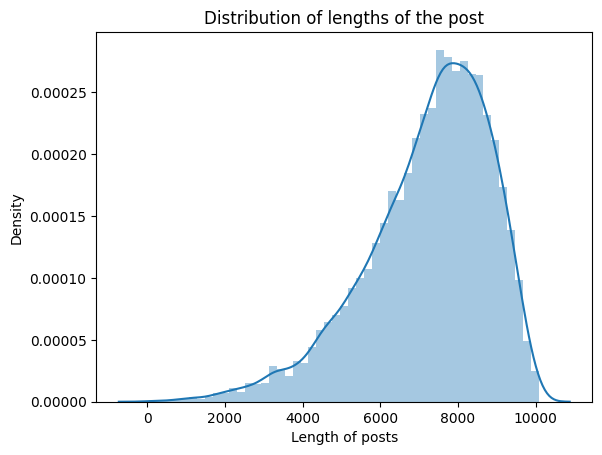

In [7]:
sns.distplot(df["posts"].apply(len))
plt.xlabel("Length of posts")
plt.ylabel("Density")
plt.title("Distribution of lengths of the post")

**Data Preprocessing**

In [8]:
df["posts"] = df["posts"].str.lower()       #converts text in posts to lowercase as it is preferred in nlp

In [9]:
for i in range(len(df)):
  post_temp= df._get_value(i, 'posts')
  pattern = re.compile(r'https?://[a-zA-Z0-9./-]*/[a-zA-Z0-9?=_.]*[_0-9.a-zA-Z/-]*')    #to match url links present in the post
  post_temp= re.sub(pattern, ' ', post_temp)                                            #to replace that url link with space
  df._set_value(i, 'posts',post_temp)

In [10]:
for i in range(len(df)):
  post_temp=df._get_value(i, 'posts')
  pattern = re.compile(r'[0-9]')                                    #to match numbers from 0 to 9
  post_temp= re.sub(pattern, ' ', post_temp)                        #to replace them with space
  pattern = re.compile('\W+')                                       #to match alphanumeric characters
  post_temp= re.sub(pattern, ' ', post_temp)                        #to replace them with space
  pattern = re.compile(r'[_+]')
  post_temp= re.sub(pattern, ' ', post_temp)
  df._set_value(i, 'posts',post_temp)

In [11]:
for i in range(len(df)):
  post_temp=df._get_value(i, 'posts')
  pattern = re.compile('\s+')                                     #to match multiple whitespaces
  post_temp= re.sub(pattern, ' ', post_temp)                      #to replace them with single whitespace
  df._set_value(i, 'posts', post_temp)

In [12]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
for i in range(df.shape[0]):
  post_temp=df._get_value(i, 'posts')
  post_temp=" ".join([w for w in post_temp.split(' ') if w not in stop_words])    #to remove stopwords
  df._set_value(i, 'posts', post_temp)

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
for i in range(df.shape[0]):
  post_temp=df._get_value(i, 'posts')
  post_temp=" ".join([lemmatizer.lemmatize(w) for w in post_temp.split(' ')])   #to implement lemmetization i.e. to group together different forms of a word
  df._set_value(i, 'posts', post_temp)

In [16]:
df

,type,posts
0,INFJ,enfp intj moment sportscenter top ten play pr...
1,ENTP,finding lack post alarming sex boring positio...
2,INTP,good one course say know blessing curse absol...
3,INTJ,dear intp enjoyed conversation day esoteric g...
4,ENTJ,fired another silly misconception approaching...
...,...,...
8670,ISFP,ixfp always think cat fi doms reason especial...
8671,ENFP,thread already exists someplace else post hec...
8672,INTP,many question thing would take purple pill pi...
8673,INFP,conflicted right come wanting child honestly ...


In [17]:
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(df, test_size=0.2, random_state=42,stratify=df['type'])

In [18]:
test_data

,type,posts
7814,INFP,macona depends big family extroverted people ...
2233,ENFJ,blodsmak sveltihel brilliant episode regenera...
7261,INFJ,heylena lol compliment accepted thank jeesh f...
7794,INFJ,pac right rocket coffin like packed warhead r...
2950,INTJ,title thread misleading mention world dominat...
...,...,...
2006,INTJ,one sentence restrictive accurately portray d...
7137,ISTJ,wanted like odd hybrid dr james wilson house ...
6091,ENTP,took cognitive process test got cognitive pro...
2997,INFJ,get caught fantacy relationship better forget...


In [19]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english')
vectorizer.fit(train_data.posts)
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train_target=encoder.fit_transform(train_data.type)
test_target=encoder.fit_transform(test_data.type)

**Random Forest Classifier**

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc=RandomForestClassifier()
rfc.fit(train_post,train_target)
pred_rfc=rfc.predict(test_post)

In [23]:
print("The test acccuracy score for model trained on Random Forest Classifier is:",accuracy_score(test_target,pred_rfc))

The test acccuracy score for model trained on Random Forest Classifier is: 0.5469740634005764


In [24]:
from sklearn.metrics import classification_report
personality_types=encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Random Forest Classifier\n',classification_report(test_target,rfc.predict(test_post),target_names=personality_types))

Test classification report of Random Forest Classifier
               precision    recall  f1-score   support

        ENFJ       1.00      0.03      0.05        38
        ENFP       0.74      0.41      0.53       135
        ENTJ       1.00      0.02      0.04        46
        ENTP       0.61      0.35      0.44       137
        ESFJ       0.00      0.00      0.00         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.54      0.68      0.61       294
        INFP       0.48      0.85      0.61       366
        INTJ       0.58      0.51      0.54       218
        INTP       0.59      0.75      0.66       261
        ISFJ       0.50      0.03      0.06        33
        ISFP       0.50      0.02      0.04        54
        ISTJ       0.00      0.00      0.00        41
        ISTP       0.88      0.31      0.46        67

    accuracy            

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Logistic Regression**

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model=LogisticRegression()
model.fit(train_post,train_target)
pred_model=model.predict(test_post)

In [27]:
print("The test accuracy score for model trained on Logistic Regression is:",accuracy_score(test_target,pred_model))

The test accuracy score for model trained on Logistic Regression is: 0.6495677233429394


In [28]:
from sklearn.metrics import classification_report
personality_types=encoder.inverse_transform([i for i in range(16)])
print('Test classification report of Random Forest Classifier\n',classification_report(test_target,model.predict(test_post),target_names=personality_types))

Test classification report of Random Forest Classifier
               precision    recall  f1-score   support

        ENFJ       0.64      0.18      0.29        38
        ENFP       0.75      0.59      0.66       135
        ENTJ       0.60      0.26      0.36        46
        ENTP       0.66      0.53      0.59       137
        ESFJ       1.00      0.11      0.20         9
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       1.00      0.11      0.20        18
        INFJ       0.65      0.71      0.68       294
        INFP       0.60      0.86      0.71       366
        INTJ       0.62      0.67      0.64       218
        INTP       0.68      0.84      0.75       261
        ISFJ       0.67      0.18      0.29        33
        ISFP       0.80      0.30      0.43        54
        ISTJ       0.75      0.22      0.34        41
        ISTP       0.69      0.52      0.59        67

    accuracy            

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [29]:
import pickle

In [30]:
with open('personality_prediction_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

with open('lemmatizer.pkl', 'wb') as f:
    pickle.dump(lemmatizer, f)

with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [31]:
from google.colab import files

files.download('encoder.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>